In [36]:
import sys
sys.path.append('..')  # 匯入父目錄檔案的設定
from common.trainer import Trainer
from common.optimizer import Adam
from simple_cbow import SimpleCBOW
from common.util import preprocess, create_contexts_target, convert_one_hot

In [60]:
window_size = 1 #context window size
hidden_size = 5 #中間層NN數量
batch_size = 3  #data分成三批做training
max_epoch = 1000 #

### 準備語料庫 (corpus): You say YES but I say No

In [61]:
text = 'You say YES but I say No.'
corpus, word_to_id, id_to_word = preprocess(text)
print("語料庫 curpus: %s"%(id_to_word))

語料庫 curpus: {0: 'you', 1: 'say', 2: 'yes', 3: 'but', 4: 'i', 5: 'no', 6: '.'}


In [62]:
vocab_size = len(word_to_id)
print("詞彙長度: %s"%(vocab_size))

詞彙長度: 7


### 建立上下文 (contexts) 與 目標(target)

In [63]:
contexts, target = create_contexts_target(corpus, window_size)
print("上下文陣列：\n%s "%(contexts))
print("預測目標陣列： %s"%(target))

上下文陣列：
[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]] 
預測目標陣列： [1 2 3 4 1 5]


### target 轉成one-hot encoding

In [64]:
target = convert_one_hot(target, vocab_size)
print("one-hot encoding:\n%s"%(target))

one-hot encoding:
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]]


### contexts 轉成one-hot encoding

In [65]:
contexts = convert_one_hot(contexts, vocab_size)
contexts

array([[[1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0]],

       [[0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0]],

       [[0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0]],

       [[0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 1, 0]],

       [[0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1]]], dtype=int32)

### 建立CBOW model

In [66]:
model = SimpleCBOW(vocab_size, hidden_size)
print("CBOW model:\n%s"%(model))

CBOW model:


### 學習優化器(Optimizer) 使用 Adam 演算法

In [67]:
optimizer = Adam()
optimizer

### Trainer 進行類神經網路的學習
#### 資料 -> 類神經網路 -> 計算梯度 -> 將計算的梯度給optimizer 更新參數

In [68]:
trainer = Trainer(model, optimizer)

In [69]:
trainer.fit(contexts, target, max_epoch, batch_size)

| epoch 1 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

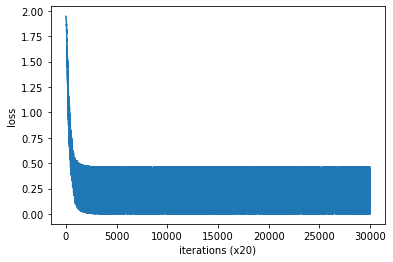

In [71]:
trainer.plot()

### 顯示稠密向量，即字詞的分散式表示
### 表示 '詞意' 的向量

In [74]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [ 2.389781  -2.8504655  2.2916067 -4.7344084 -1.4360737]
say [ 0.02170205 -2.1931672  -0.8495333  -0.40349588  0.91346484]
yes [ 1.507059   -0.35953155  1.4704247   2.423219   -2.120432  ]
but [-0.02165045  2.193178   -1.0363437   0.10960815 -2.7591264 ]
i [ 1.5337352  -0.35026103  1.4699728   2.4575305  -2.1293223 ]
no [ 2.4032457 -2.8421452  2.2646062 -4.77022   -1.423683 ]
. [-1.37976    -4.9060893  -0.38826877 -0.46008205  3.914595  ]
